
# PCA and LDA on face dataset and classification using SVM
Asad Ahmed

Importing Libraries

In [51]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  svm
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Load Face Dataset

In [52]:
# Load Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=22)
X = faces_data.data
y = faces_data.target

Split Datset into train and test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Feature Scalling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train.shape,y_train.shape

((280, 4096), (280,))

PCA for dimensionality reduction

In [55]:
# PCA for dimensionality reduction
n_components_pca = 15
pca = PCA(n_components=n_components_pca)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


LDA for dimensionality reduction

In [56]:
# LDA for dimensionality reduction
n_components_lda = 15
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

Visualize the first few principal and lda components

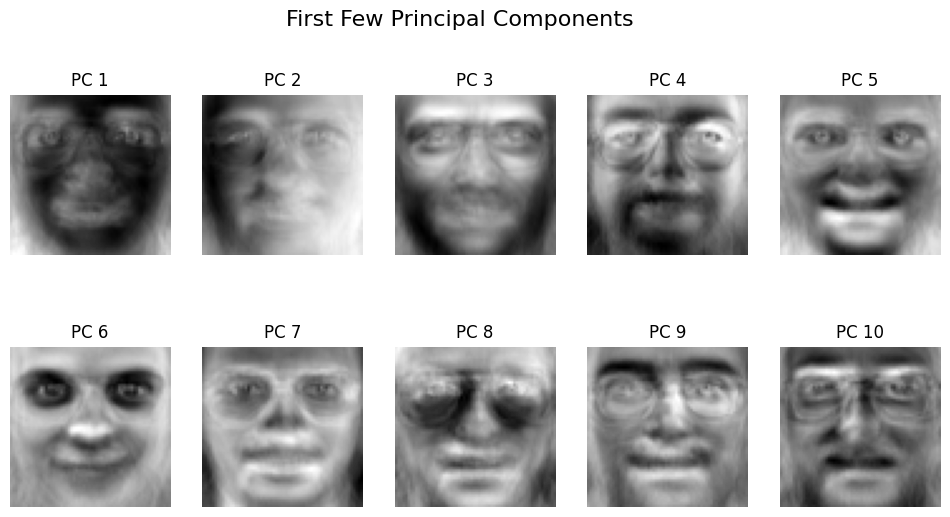

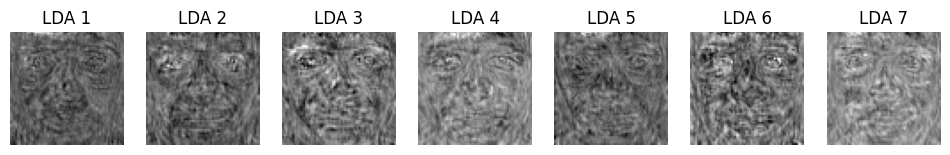

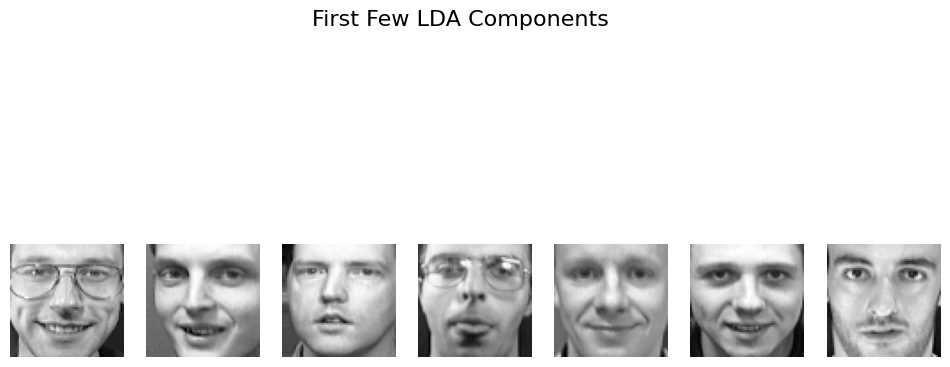

In [57]:
# Visualize the first few principal components
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
    plt.title("PC {}".format(i + 1))
    plt.axis("off")
plt.suptitle("First Few Principal Components", fontsize=16)
plt.show()

# Visualize the first few LDA components
plt.figure(figsize=(12, 6))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(lda.scalings_[:, i].reshape(64, 64), cmap='gray')
    plt.title("LDA {}".format(i + 1))
    plt.axis("off")

plt.figure(figsize=(12, 6))
for i in range(7):   
    plt.subplot(1, 7, i + 1)
    plt.imshow(X[i].reshape(64, 64), cmap='gray')
    plt.axis("off")


plt.suptitle("Original Images", fontsize=16)
plt.suptitle("First Few LDA Components", fontsize=16)

plt.show()

> Lab Task: Use the PCA and LDA transformed feature and perform face classification using SVM classifier

- 1. Data Split
- 2. Feature Scaling
- 3. Train Model on PCA & LDA
- 4. Predict Model
- 5. Evaluate the Model

Instantiate SVM classifier

In [58]:
# instatiate classifier SVM
classifier = svm.SVC(kernel='linear')

# Training

Training  SVM Model on PCA Dataset

In [59]:
# fit classifier to training on PCA dataset 
classifier.fit(X_train_pca, y_train)

# making predictions on PCA data trained model
y_pred_pca = classifier.predict(X_test_pca)

# compute and print accuracy score
print('Model accuracy score with PCA hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_pca)))

Model accuracy score with PCA hyperparameters: 0.9417


Training  Classifier on LDA Dataset

In [60]:
# fit classifier to training on PCA dataset 
classifier.fit(X_train_lda, y_train)

# making predictions on PCA data trained model
y_pred_lda = classifier.predict(X_test_lda)

# compute and print accuracy score
print('Model accuracy score with PCA hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lda)))

Model accuracy score with PCA hyperparameters: 0.9417


# Visualize

C:\Users\asad\AppData\Local\Temp\ipykernel_11616\2084008602.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


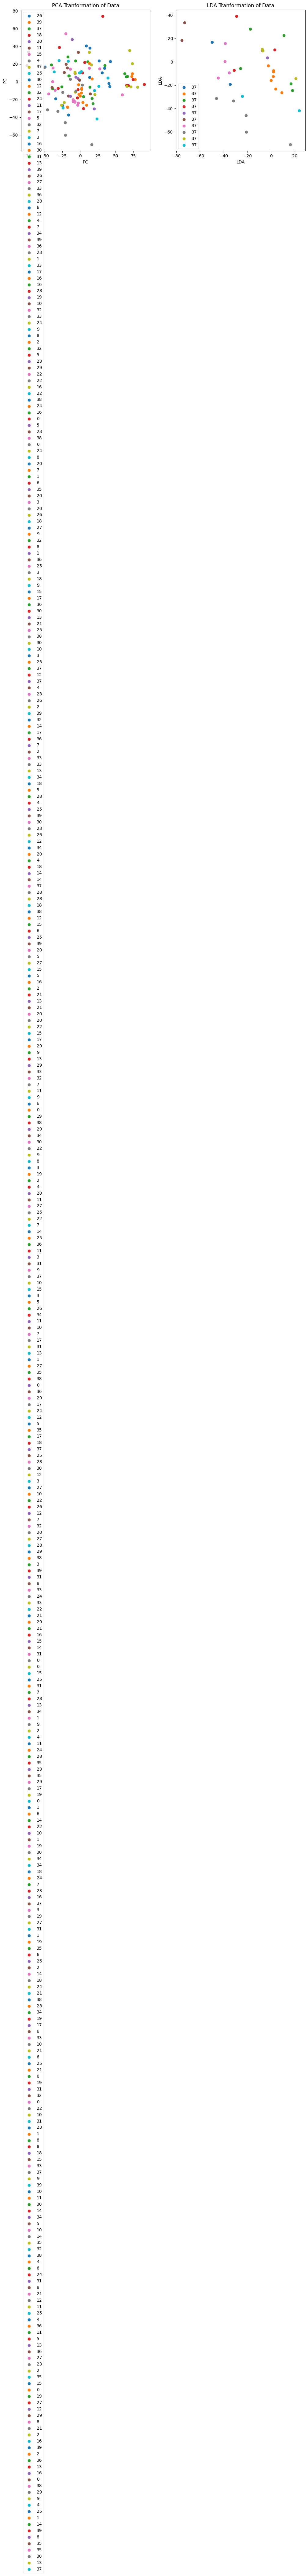

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
for i, target_name in enumerate(faces_data.target):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=target_name)
plt.title('PCA Tranformation of Data')
plt.xlabel('PC')
plt.ylabel('PC')
plt.legend()

plt.subplot(1,2,2)
for i in range(10):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=target_name)
plt.title('LDA Tranformation of Data')
plt.xlabel('LDA')
plt.ylabel('LDA')
plt.legend()

plt.tight_layout()
plt.show()